<a href="https://colab.research.google.com/github/yxxn15/skills-introduction-to-github1/blob/main/Copy_of_BDU_ch08_boston_housing_l2_l1_restriction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 sklearn 에서 사용하는  toy data를 이용한다.


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Now you have the data and target variables:
# data: features (X)
# target: target variable (y)

# You can use these variables in your further analysis
# Example:
# x_data = data
# y_data = target.reshape(target.size, 1)

In [ ]:
x_data = data
y_data = target.reshape(target.size,1)
y_data.shape # (506, 1)

(506, 1)

In [ ]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) # (1)
x_scaled_data = minmax_scale.transform(x_data) # (2)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33, random_state=42)
# X 데이터의 학습 데이터셋, X 데이터의 테스트 데이터셋
# Y 데이터의 학습 데이터셋, Y 데이터의 테스트 데이터셋

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((339, 13), (167, 13), (339, 1), (167, 1))

((339, 13), (167, 13), (339, 1), (167, 1))

In [ ]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(
         fit_intercept=True, copy_X=True, n_jobs=8) # Removed normalize parameter
lasso_regr = linear_model.Lasso(
         alpha=0.01, fit_intercept=True, copy_X=True) # Removed normalize parameter
ridge_regr = linear_model.Ridge(
         alpha=0.01, fit_intercept=True, copy_X=True) # Removed normalize parameter
SGD__regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01,
                                      max_iter=1000, tol=0.001, eta0=0.01)

기본 선형 회귀 모델 (정규화 없이 최소제곱 해 구함)

fit_intercept=True: 절편
𝑏
b 를 학습에 포함

copy_X=True: 입력 데이터를 복사하여 내부에서 사용 (원본 보호)

n_jobs=8: 병렬 처리에 사용할 CPU 코어 수 (8개 사용)

👉 기본 모델로, 어떤 제약이나 정규화도 적용되지 않습니다.


---

L1 정규화 기반 선형 회귀 (Lasso Regression)

alpha=0.01: 정규화 강도 (λ), 클수록 가중치들이 더 작아지고, 일부는 0이 됨 (특성 선택 효과)

희소 모델(Sparse model)을 만들고 싶을 때 유용

👉
𝐽
(
𝑤
)
=
MSE
+
𝜆
∑
∣
𝑤
𝑗
∣
J(w)=MSE+λ∑∣w
j
​
 ∣

 -------

 L2 정규화 기반 선형 회귀 (Ridge Regression)

alpha=0.01: 정규화 강도

모든 가중치를 0에 가깝게 만들지만 완전히 0으로 만들진 않음 → 해석력은 유지

👉
𝐽
(
𝑤
)
=
MSE
+
𝜆
∑
𝑤
𝑗
2
J(w)=MSE+λ∑w
j
2
​



---------------------

경사 하강법을 사용해서 점진적으로 학습하는 회귀 모델

penalty="l2": Ridge (L2 정규화) 사용

alpha=0.01: 정규화 계수 (penalty strength)

max_iter=1000: 최대 반복 횟수

tol=0.001: 수렴 기준 (cost 변화가 이보다 작아지면 종료)

eta0=0.01: 초기 학습률

👉 배치 기반이 아닌 SGD 방식으로 더 빠르고, 대용량 데이터에 적합합니다.




In [ ]:
regr.fit(X_train, y_train)

LinearRegression(n_jobs=8)

In [ ]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-2.2909694   0.75646446  0.3175988   0.64773362 -1.57170572  4.072961
  -0.2495622  -3.12801167  1.08032801 -0.86075588 -1.74599822  0.93351697
  -3.96876082]]
intercept:  [25.44049052]


In [ ]:
regr.predict(x_data[:5])

array([[106.97641228],
       [114.82847044],
       [138.8634193 ],
       [159.67751118],
       [150.73777232]])

아래 부분은 수동으로 구현 한 것. ( library를 사용하지 않고 수동으로 구분한 것으로 우리는 이런 방법을 사용하지 않을 것이다 )

In [ ]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[106.97641228],
       [114.82847044],
       [138.8634193 ],
       [159.67751118],
       [150.73777232]])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.726157083655247, 3.1482557548168333, 20.7240234373398)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

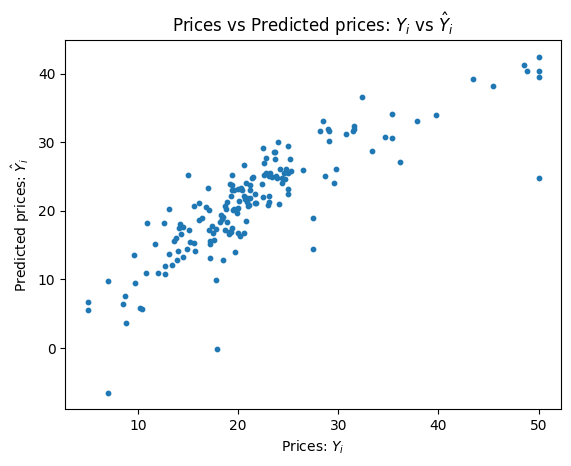

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

 ## 각 모델별로 성적 평가 ( R^2, MAE, MSE )를 각각 구해서 비교해 보자 )

SGDRegressor는 조금 더 오차가 있으며, 이는 학습률, 반복 횟수, 데이터 순서 등에 따라 바뀔 수 있습니다.

Lasso는 가중치(기울기)를 0에 더 가깝게 만드는 경향이 있으나, 이번 예제에서는 큰 차이는 없습니다 (특성이 1개라서).

모든 모델은 비슷한 예측 성능을 보임.

차이는 정규화 유무와 방식, 학습 방식에 있음:

LinearRegression: 전통적인 최소제곱 해

Ridge: 가중치를 작게 만들며 과적합 방지

Lasso: 불필요한 변수 제거 가능 (희소성)

SGDRegressor: 데이터가 많을 때 적합, 빠르지만 다소 불안정

1. Full Batch + L2 정규화: Ridge

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.01)
model.fit(X_train, y_train)


Ridge(alpha=0.01)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.6597565108509129, 3.4142607003303715, 25.749119742249842)

2. Full Batch + L1 정규화: Lasso

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)


Lasso(alpha=0.01)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.726313642738127, 3.141114807548394, 20.71217527947528)

3. Full Batch + No Regularization: LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.726157083655247, 3.1482557548168333, 20.7240234373398)

4. SGD (Mini-Batch) + L2 정규화

In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(penalty='l2', alpha=0.01, max_iter=1000, learning_rate='invscaling', random_state=42)
model.fit(X_train, y_train.ravel())



SGDRegressor(alpha=0.01, random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.6601029881070334, 3.4147987068011934, 25.722898860321653)

5. SGD (Mini-Batch) + L1 정규화

In [ ]:
model = SGDRegressor(penalty='l1', alpha=0.01, max_iter=1000, learning_rate='invscaling', random_state=42)
model.fit(X_train, y_train.ravel())


SGDRegressor(alpha=0.01, penalty='l1', random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.659367319153729, 3.414208625980783, 25.778573189363662)

6. SGD (Mini-Batch) + ElasticNet (L1 + L2 혼합)

In [ ]:
model = SGDRegressor(penalty='elasticnet', l1_ratio=0.5, alpha=0.01, max_iter=1000, learning_rate='invscaling', random_state=42)
model.fit(X_train, y_train.ravel())


SGDRegressor(alpha=0.01, l1_ratio=0.5, penalty='elasticnet', random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.6597565108509129, 3.4142607003303715, 25.749119742249842)

SGDRegressor는 내부적으로 mini-batch를 사용하며, full-batch 방식이 필요하다면 Ridge, Lasso, LinearRegression 등을 사용해야 합니다. 각 방식은 fit 함수 내부에서 처리되므로 별도로 batch 크기를 명시하지 않아도 됩니다.